 # <center> Data Pre-processing: Missing Values

## Handling Missing Values 

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ydata_profiling as yp

In [170]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test_houses.csv")

In [171]:
dataset={"train_df":train_df,"test_df":test_df}


In [172]:
for df,data in zip(dataset.values(),dataset.keys()) :
    print(f"_________________{data}_____________________")
    df.info()

_________________train_df_____________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  Overa

In [173]:
train_df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
592,593,20,RL,60.0,6600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,8,1982,2003,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,TA,Gd,No,GLQ,816,Unf,0,0,816,GasA,Ex,Y,SBrkr,816,0,0,816,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1985.0,Fin,2,816,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,138000
209,210,20,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1964,1964,Hip,CompShg,HdBoard,HdBoard,Stone,260.0,TA,TA,CBlock,Gd,TA,No,Rec,787,Unf,0,305,1092,GasA,Ex,Y,SBrkr,1092,0,0,1092,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1964.0,RFn,2,504,TA,Gd,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,145000
414,415,60,RL,59.0,11228,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1993,1993,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,BLQ,50,GLQ,531,499,1080,GasA,Ex,Y,SBrkr,1080,1017,0,2097,0,1,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1993.0,Unf,3,678,TA,TA,Y,196,187,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,228000
1398,1399,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,4,1950,1982,Gable,CompShg,VinylSd,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,180,BLQ,352,676,1208,GasA,Gd,Y,FuseA,1136,768,0,1904,1,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,0,0,168,0,0,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,138000
427,428,20,RL,77.0,8593,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1957,1957,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,288,Unf,0,619,907,GasA,Ex,Y,SBrkr,907,0,0,907,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1964.0,Unf,1,352,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,109008


In [174]:
for df,data in zip(dataset.values(),dataset.keys()) :
    print(f"_________________{data}___________________")
    for col in df.columns:
        print(col, ":",df[col].isnull().sum())

_________________train_df___________________
Id : 0
MSSubClass : 0
MSZoning : 0
LotFrontage : 259
LotArea : 0
Street : 0
Alley : 1369
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 8
MasVnrArea : 8
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinSF1 : 0
BsmtFinType2 : 38
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageCars : 0
GarageArea : 0
GarageQual : 8

### we can see the messing values in our data, lets handle with it :

#### LotFrontage (259) :

In [175]:
for df,data in zip(dataset.values(),dataset.keys()):
    print(data)
    print(df["LotFrontage"].nunique())
    print(df["LotFrontage"].mean())

train_df
110
70.04995836802665
test_df
115
68.58035714285714


In [176]:
(70.0499+68.5803)/2

69.3151

In [177]:
df=train_df.append(test_df)

C:\Users\hp\AppData\Local\Temp\ipykernel_10152\715710.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=train_df.append(test_df)


In [178]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

### LotFrontage

In [179]:
# mean of LotFrontage :
df["LotFrontage"].mean()

69.30579531442663

In [180]:
# count unique values :
df["LotFrontage"].value_counts().to_frame()

,LotFrontage
60.0,276
80.0,137
70.0,133
50.0,117
75.0,105
...,...
152.0,1
138.0,1
182.0,1
168.0,1


In [181]:
# replace non values with mean:
df["LotFrontage"].replace(np.nan,df["LotFrontage"].mean(),inplace=True)
df["LotFrontage"].isnull().sum()

0

### Alley (2721) :

In [182]:
df["Alley"].isnull().sum()

2721

*2721* mv in Alley column.

In [183]:
df["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

 * the number of mv is too big, so my desicion is to drop this column

In [184]:
df.drop(columns=["Alley"],inplace=True)

In [185]:
for col in df.columns:
    print(col,":",df[col].isnull().sum())

Id : 0
MSSubClass : 0
MSZoning : 4
LotFrontage : 0
LotArea : 0
Street : 0
LotShape : 0
LandContour : 0
Utilities : 2
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 1
Exterior2nd : 1
MasVnrType : 24
MasVnrArea : 23
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 81
BsmtCond : 82
BsmtExposure : 82
BsmtFinType1 : 79
BsmtFinSF1 : 1
BsmtFinType2 : 80
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 1
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 2
BsmtHalfBath : 2
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 1
TotRmsAbvGrd : 0
Functional : 2
Fireplaces : 0
FireplaceQu : 1420
GarageType : 157
GarageYrBlt : 159
GarageFinish : 159
GarageCars : 1
GarageArea : 1
GarageQual : 159
GarageCond : 159
PavedDrive : 0
WoodDeckSF : 0
Open

In [186]:
import matplotlib.pyplot as plt

## MSZoning :

In [187]:
df[["MSZoning"]].value_counts()


MSZoning
RL          2265
RM           460
FV           139
RH            26
C (all)       25
dtype: int64

#### the most frequent value is "RL" with a big frequence 2265, so we can replace missing values with "RL"

In [188]:
df["MSZoning"].replace(np.nan,"RL",inplace=True)
df[["MSZoning"]].isnull().sum()

MSZoning    0
dtype: int64

## Utilities : 

Type of utilities available

In [189]:
df[["Utilities"]].value_counts()

Utilities
AllPub       2916
NoSeWa          1
dtype: int64

In [190]:
df["Utilities"].replace(np.nan,"AllPub",inplace=True)

## Exterior1st :

In [191]:
df["Exterior1st"].value_counts().to_frame()#.plot(kind="bar")
df["Exterior1st"].replace(np.nan,"VinylSd",inplace=True)

## Exterior2nd :

In [192]:
df["Exterior2nd"].value_counts().to_frame()#.plot(kind="bar")
df["Exterior2nd"].replace(np.nan,"VinylSd",inplace=True)

## MasVnrType (23) :

In [193]:
df["MasVnrType"].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

as MasVnrType is categorical variable, we can chose to replace the mv by the mode (None) 

In [194]:
df["MasVnrType"].replace(np.nan,"None",inplace=True)

## MasVnrArea (24) :

In [195]:
df["MasVnrArea"].value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [196]:
df["MasVnrArea"].mean()

102.20131215469613

We can observe that the "None" type of MasVnrType frequency is the same of the frequency of 
the value 0.0 which is equal to 1778, so we can resume that the "None" type have a 0.0 area.
so we can replace ms by 0.0 squared fit.

In [197]:
df["MasVnrArea"].replace(np.nan,0.0,inplace=True)


## BsmtQual (81) :

In [198]:
df["BsmtQual"].isnull().sum()

81

In [199]:
df["BsmtQual"].value_counts()

TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'TA'), Text(1, 0, 'Gd'), Text(2, 0, 'Ex'), Text(3, 0, 'Fa')])

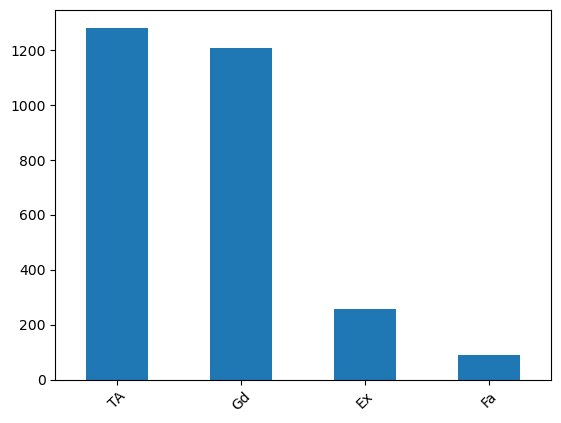

In [200]:
df["BsmtQual"].value_counts().plot(kind="bar")
plt.xticks(rotation=45)

In [201]:
df[df["BsmtQual"]=="NA"]["BsmtQual"]

Series([], Name: BsmtQual, dtype: object)

in the description file, the mention that NA==No Basement, but in our dataset we can't found any house with 
no basement, however, its mentioned as NaN value.
so, the good practice her is to replace NaN values with "Na" How is mean No basemet. 

In [202]:
df["BsmtQual"].replace(np.nan, "Na", inplace = True)

<Axes: ylabel='BsmtQual'>

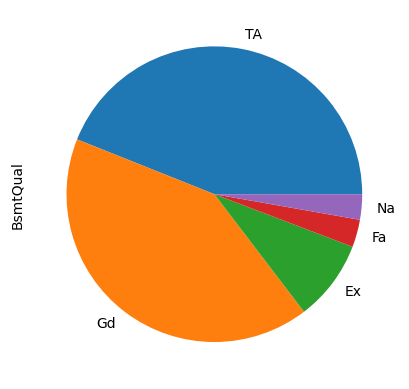

In [203]:
df["BsmtQual"].value_counts().plot(kind="pie")

### BsmtCond :
We will handl missing values with the same way as BsmtQual 

In [204]:
df["BsmtCond"].value_counts()

TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64

In [205]:
df["BsmtCond"].replace(np.nan,"Na",inplace=True)

<Axes: >

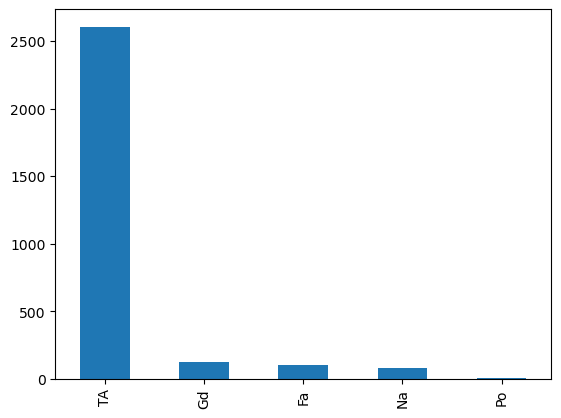

In [206]:
df["BsmtCond"].value_counts().plot(kind="bar")

### BsmtExposure : 82 
if there is no basement,so directly there no BsmtExposure.
NaN values here means there is no basement, so we will replace NaN by "Na" 

In [207]:
df["BsmtExposure"].replace(np.nan,"Na",inplace=True)

<Axes: >

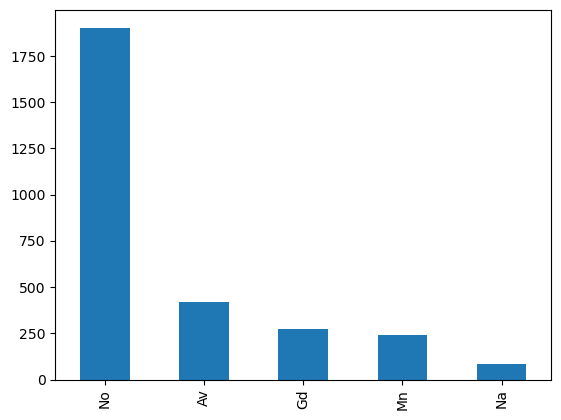

In [208]:
df["BsmtExposure"].value_counts().plot(kind="bar")

### BsmtFinType1 : 79 
Rating of basement finished area

<Axes: >

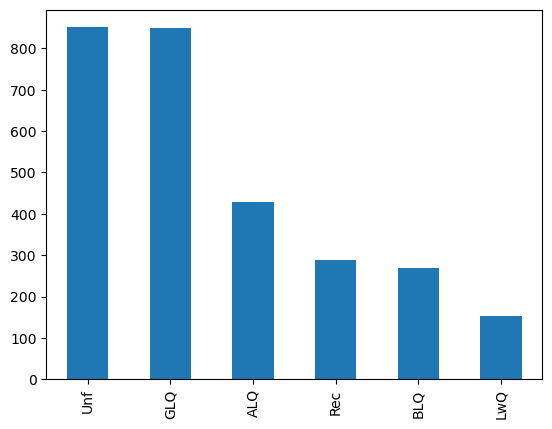

In [209]:
df["BsmtFinType1"].value_counts().plot(kind="bar")

In [210]:
df[df["BsmtFinType1"].isnull()]["BsmtQual"].value_counts()

Na    79
Name: BsmtQual, dtype: int64

In [211]:
df[df["BsmtQual"]=="Na"]["BsmtFinType1"].value_counts()

Unf    2
Name: BsmtFinType1, dtype: int64

<Axes: >

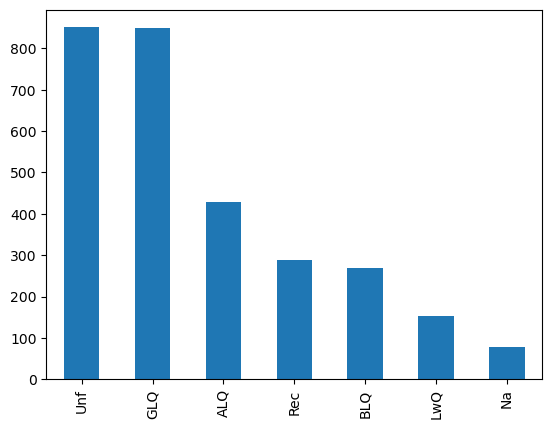

In [212]:
df["BsmtFinType1"].replace(np.nan,"Na",inplace=True)
df["BsmtFinType1"].value_counts().plot(kind="bar")

### BsmtFinSF1 : 1

In [213]:
df[["BsmtFinSF1"]].value_counts().to_frame()#.plot(kind="hist")
#px.histogram(df,x="BsmtFinSF1")

,0
BsmtFinSF1,
0.0,929
24.0,27
16.0,14
300.0,9
20.0,8
...,...
645.0,1
642.0,1
634.0,1


In [214]:
df[df["BsmtFinSF1"].isnull()]["BsmtQual"]

660    Na
Name: BsmtQual, dtype: object

the only house with a missing value in Type 1 finished square feet hasn't a basement.
so lets to replace it with 0.

In [215]:
df["BsmtFinSF1"].replace(np.nan,0,inplace=True)

### BsmtFinType2  80 :

In [216]:
df["BsmtFinSF2"].replace(np.nan,0,inplace=True)

### BsmtFinType2 80 : 

In [217]:
df["BsmtFinType2"].value_counts()

Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

In [218]:
df["BsmtFinType2"].replace(np.nan,"Unf",inplace=True)


### BsmtUnfSF : 1

In [219]:
df["BsmtUnfSF"].value_counts()

0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
257.0       1
1217.0      1
539.0       1
39.0        1
1503.0      1
Name: BsmtUnfSF, Length: 1135, dtype: int64

In [220]:
df["BsmtUnfSF"].mean()

560.7721041809458

In [221]:
df["BsmtUnfSF"].replace(np.nan,0.0,inplace=True)
df["BsmtUnfSF"].mean()

560.5799931483384

### TotalBsmtSF : 1

In [222]:
df["TotalBsmtSF"].replace(np.nan,0.0,inplace=True)

### Electrical : 1

In [223]:
df["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [224]:
df["Electrical"].replace(np.nan,"SBrkr",inplace=True)

### Functional : 2

In [225]:
df[["Functional"]].value_counts()

Functional
Typ           2717
Min2            70
Min1            65
Mod             35
Maj1            19
Maj2             9
Sev              2
dtype: int64

In [226]:
df["Functional"].replace(np.nan,"Typ",inplace=True)

### BsmtFullBath : 2

In [227]:
df.BsmtFullBath.value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [228]:
df["BsmtFullBath"].replace(np.nan,0.0,inplace=True)

### BsmtHalfBath : 2

In [229]:
df.BsmtHalfBath.value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [230]:
df["BsmtHalfBath"].replace(np.nan,0.0,inplace=True)

### KitchenQual : 1

In [231]:
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [232]:
df["KitchenQual"].replace(np.nan,"TA",inplace=True)

### FireplaceQu : 1420
### PoolQC : 2909
### Fence : 2348
### MiscFeature : 2814

In [233]:
for col in ["PoolQC","Fence","MiscFeature"]:
    print(col,":",df[col].isnull().sum())

PoolQC : 2909
Fence : 2348
MiscFeature : 2814


the missing values in the previouse columns are so important,so the best practice is to 
drop all those columns.

In [234]:
#df.drop(columns=["FireplaceQu"],inplace=True)
df.drop(columns=["PoolQC","Fence","MiscFeature"],inplace=True)

### GarageType : 157

In [235]:
df["GarageType"].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [236]:
df["GarageType"].replace(np.nan,"Attchd",inplace=True)
df["GarageType"].isnull().sum()

0

### GarageYrBlt : 159

In [237]:
df["GarageYrBlt"].value_counts()

2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1908.0      1
1896.0      1
1933.0      1
1906.0      1
1919.0      1
Name: GarageYrBlt, Length: 103, dtype: int64

In [238]:
pd.set_option("display.max_columns",100)

In [239]:
df[df["GarageType"]=="Attchd"]["GarageYrBlt"].value_counts().to_frame()
df[df["GarageYrBlt"]==2207]#["GarageYrBlt"]
df["GarageYrBlt"].replace(2207,2005,inplace=True)

In [240]:
df[df["GarageType"]=="Attchd"]["GarageYrBlt"].describe()

count    1723.000000
mean     1984.230412
std        20.568228
min      1900.000000
25%      1967.000000
50%      1990.000000
75%      2004.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [241]:
# To review :
df["GarageYrBlt"].replace(np.nan,1984,inplace=True)

In [161]:
df["GarageYrBlt"].isnull().sum()

0

### GarageFinish : 159

In [242]:
df["GarageFinish"].value_counts()

Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64

In [243]:
df["GarageFinish"].replace(np.nan,"Unf",inplace=True)

### GarageCars : 1
### GarageArea : 1

In [244]:
df["GarageCars"].value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [245]:
df["GarageCars"].replace(np.nan,2.0,inplace=True)

In [246]:
df["GarageArea"].replace(np.nan,0,inplace=True)

### GarageQual 159 :

In [247]:
df["GarageQual"].value_counts()

TA    2604
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [248]:
df["GarageQual"].replace(np.nan,"TA",inplace=True)
df["GarageQual"].value_counts()

TA    2763
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

In [249]:
df["GarageQual"].value_counts()

TA    2763
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64

### GarageCond : 159

In [250]:
df["GarageCond"].value_counts()

TA    2654
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

In [251]:
df["GarageCond"].replace(np.nan,"TA",inplace=True)

In [252]:
df["GarageCond"].value_counts()

TA    2813
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64

### FireplaceQu : 1420

In [253]:
df.drop(columns={"FireplaceQu"},inplace=True)

### SaleType : 1

In [254]:
df["SaleType"].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

replace with the most frequent value : "WD"

In [255]:
df["SaleType"].replace(np.nan,"WD",inplace=True)

In [256]:
for col in df.columns:
    print(col,":",df[col].isnull().sum())

Id : 0
MSSubClass : 0
MSZoning : 0
LotFrontage : 0
LotArea : 0
Street : 0
LotShape : 0
LandContour : 0
Utilities : 0
LotConfig : 0
LandSlope : 0
Neighborhood : 0
Condition1 : 0
Condition2 : 0
BldgType : 0
HouseStyle : 0
OverallQual : 0
OverallCond : 0
YearBuilt : 0
YearRemodAdd : 0
RoofStyle : 0
RoofMatl : 0
Exterior1st : 0
Exterior2nd : 0
MasVnrType : 0
MasVnrArea : 0
ExterQual : 0
ExterCond : 0
Foundation : 0
BsmtQual : 0
BsmtCond : 0
BsmtExposure : 0
BsmtFinType1 : 0
BsmtFinSF1 : 0
BsmtFinType2 : 0
BsmtFinSF2 : 0
BsmtUnfSF : 0
TotalBsmtSF : 0
Heating : 0
HeatingQC : 0
CentralAir : 0
Electrical : 0
1stFlrSF : 0
2ndFlrSF : 0
LowQualFinSF : 0
GrLivArea : 0
BsmtFullBath : 0
BsmtHalfBath : 0
FullBath : 0
HalfBath : 0
BedroomAbvGr : 0
KitchenAbvGr : 0
KitchenQual : 0
TotRmsAbvGrd : 0
Functional : 0
Fireplaces : 0
GarageType : 0
GarageYrBlt : 0
GarageFinish : 0
GarageCars : 0
GarageArea : 0
GarageQual : 0
GarageCond : 0
PavedDrive : 0
WoodDeckSF : 0
OpenPorchSF : 0
EnclosedPorch : 0
3SsnPo

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [259]:
# store df in a csv file:
df.to_csv("house_price_part1.csv")

In [ ]:
for df in dataset :
    report=yp.ProfileReport(df,orange_mode=True)
    print(report)

    

In [ ]:
report=yp.ProfileReport(train_df,orange_mode=True,dark_mode=True)
report.to_file("house_price_train_data_report.html")

In [ ]:
report=yp.ProfileReport(test_df,orange_mode=True)
report.to_file("house_price_test_data_report.html")

In [ ]:
report=yp.ProfileReport(df,dark_mode=True,orange_mode=True)
report.to_file("house_price_report.html")

In [ ]:
report.to_file("house_price_report.pdf")